In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from scipy.stats import norm

backend module://ipykernel.pylab.backend_inline version unknown


In [3]:
def norm_prob(x,mu,sigma):
    p = norm(mu,sigma).cdf(x+0.0001) - norm(mu,sigma).cdf(x-0.0001)
    return p

def loglikelihood(data,mu,sigma):
    l = 0.0
    for x in data:
        l -= np.log(norm_prob(x,mu,sigma))
    return l

In [4]:
N=1000
mu, sigma = 1.6, 0.2

h=1.8

data = norm.rvs(loc=mu, scale=sigma,size = N)

In [5]:
data

array([1.79274386, 1.83852395, 1.63242036, 1.75339905, 1.70311421,
       1.95669132, 1.58415842, 1.79579253, 1.71100392, 1.9249417 ,
       1.40710198, 1.47707656, 1.62877689, 1.63754337, 1.62725891,
       1.69991096, 1.85569978, 1.61138229, 1.35251565, 1.56704678,
       1.35067455, 1.4711653 , 1.4679774 , 1.34901559, 1.85468963,
       1.62321792, 1.67733712, 1.30729118, 1.6488501 , 1.56293031,
       1.47380067, 1.64420266, 1.67198292, 1.64941282, 1.69668754,
       1.77401935, 1.63901531, 1.83360867, 1.43867181, 1.55199734,
       1.29690053, 1.66385117, 1.46344124, 1.90469061, 1.77450948,
       1.68956281, 1.79535195, 1.63137429, 1.67338851, 1.50015767,
       1.81890843, 1.59175823, 1.93764625, 1.28594777, 2.02797841,
       1.71699418, 1.82696609, 1.19895563, 1.65720563, 1.17238269,
       1.66681292, 1.5128266 , 1.73922817, 1.46070522, 1.5058953 ,
       1.63932098, 1.59199659, 1.52658643, 1.83504859, 1.8809418 ,
       1.52961392, 1.63327604, 1.71968727, 1.99515639, 1.91937

In [135]:
norm.pdf(x=1.8,loc=1.6,scale=0.2)

1.209853622595717

In [124]:
norm_prob(h,mu,sigma)

0.00024197072451903612

In [6]:
loglikelihood(data,mu,sigma)

8312.862507910682

(array([  4.,   9.,  47., 114., 217., 246., 209., 111.,  33.,  10.]),
 array([0.91119523, 1.03740547, 1.16361571, 1.28982594, 1.41603618,
        1.54224642, 1.66845666, 1.79466689, 1.92087713, 2.04708737,
        2.17329761]),
 <a list of 10 Patch objects>)

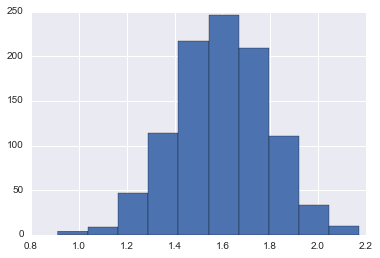

In [126]:
plt.hist(data)

In [7]:
mus = [1.4,1.5,1.6,1.7,1.8,1.9,2.0]
sigma =0.1
mus

[1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]

In [8]:
l = [loglikelihood(data,mu2,sigma) for mu2 in mus]
l

[11059.217953389621,
 9568.92626061607,
 9078.220928489656,
 9587.5149913546,
 11096.80872103586,
 13606.102117377653,
 17115.395180387084]

In [10]:
import pandas as pd
df = pd.DataFrame()
df['mu'] = mus
df['-logl'] =l
df                                     

,mu,-logl
0,1.4,11059.217953
1,1.5,9568.926261
2,1.6,9078.220928
3,1.7,9587.514991
4,1.8,11096.808721
5,1.9,13606.102117
6,2.0,17115.395180


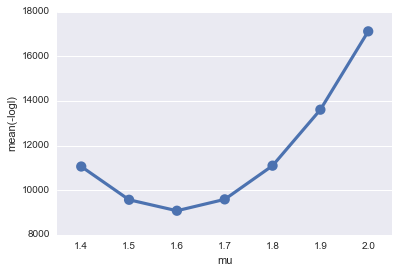

In [12]:
plt.figure(figsize=(6,4))

sns.pointplot(df['mu'],df['-logl'], alpha=0.8)